In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
df=pd.read_csv("online_shoppers_intention.csv")

In [11]:
X=df.iloc[:,0:17]
X.shape

(12330, 17)

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


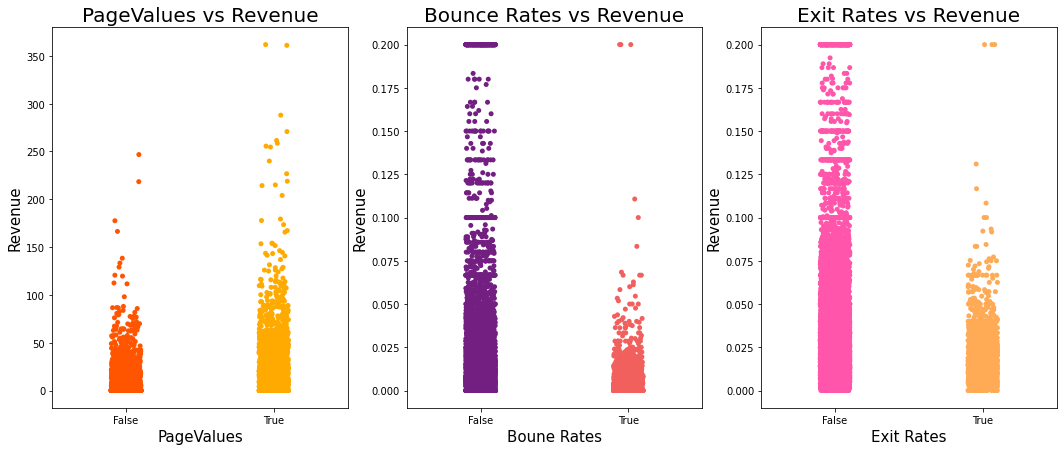

In [4]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 3, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 20)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 3, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 20)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.subplot(1, 3, 3)
sns.stripplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('Exit Rates vs Revenue', fontsize = 20)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

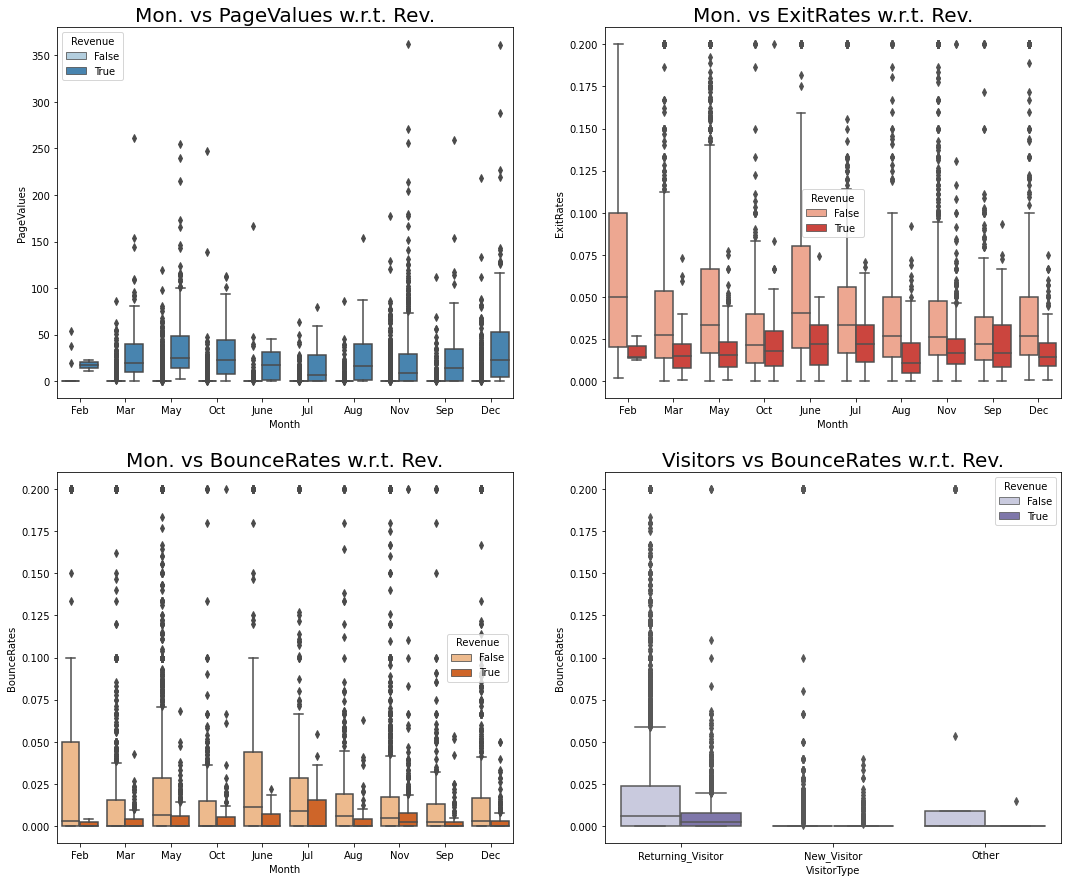

In [7]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'Blues')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 20)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 20)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 20)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 20)

plt.show()

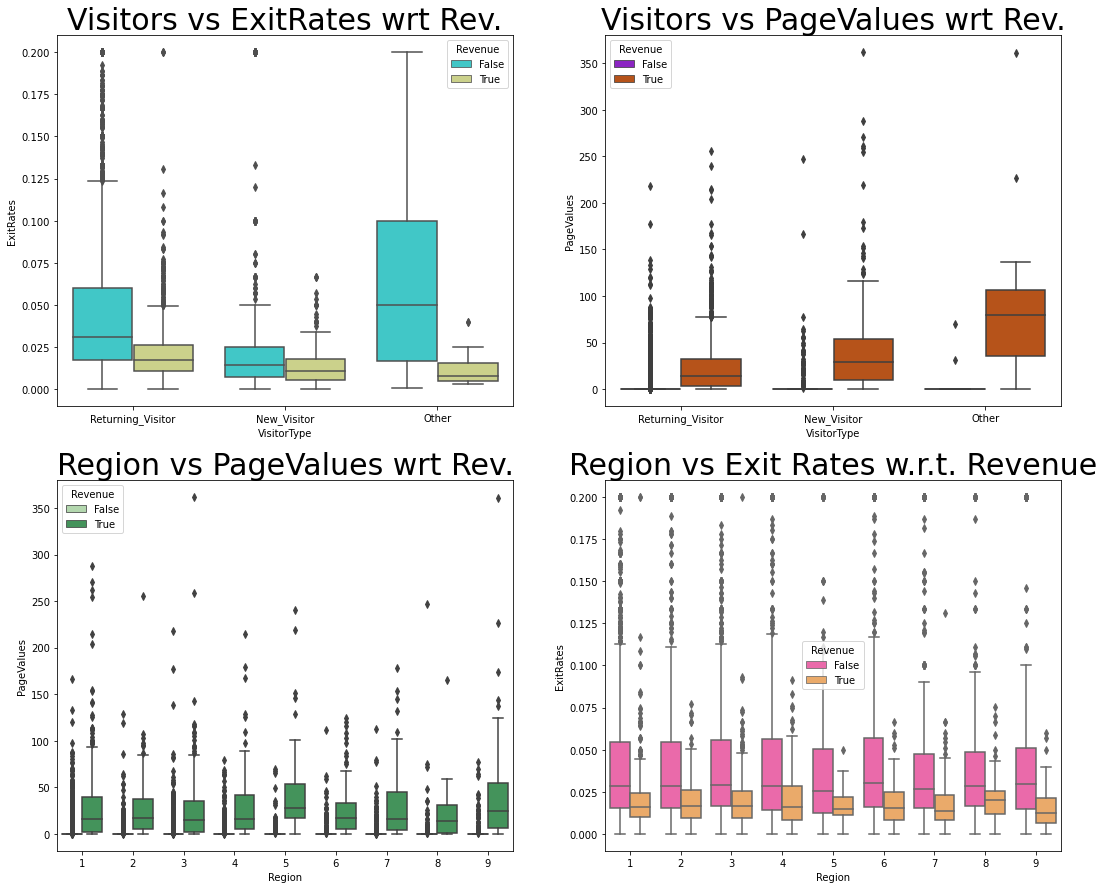

In [8]:
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [24]:
df.fillna(0, inplace = True)
# checking the no. of null values in data after imputing the missing values
df.isnull().sum().sum()

0

## Administration duration vs bounce rate

In [29]:
df.iloc[:, 0:9]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000
...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000


In [131]:
x = df.iloc[:, 0:9].values
x.shape
from sklearn.cluster import KMeans
wcss = []
sil=[]
for i in range(2, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    s=silhouette_score(x, labels, metric='euclidean', sample_size=None, random_state=None)
    sil.append(s)
    wcss.append(km.inertia_)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[Text(0, 0.5, 'wcss'), Text(0.5, 0, 'No. of Clusters')]

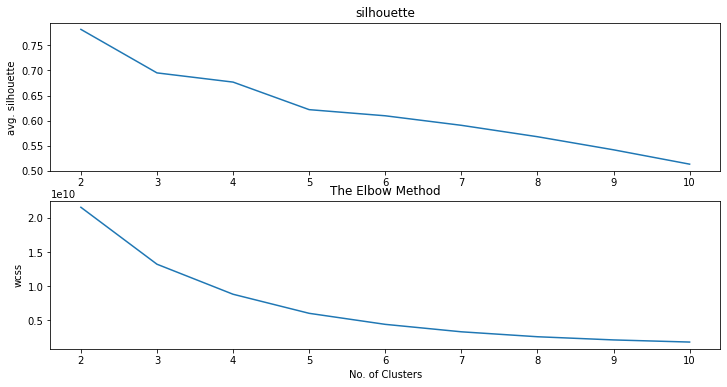

In [132]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
fig,axs=plt.subplots(2,1)
axs[0].plot(range(2,11),sil)
axs[0].set_title('silhouette')
axs[1].plot(range(2,11),wcss)
axs[1].set_title('The Elbow Method')
axs[0].set(ylabel="avg. silhouette")
axs[1].set(xlabel="No. of Clusters",ylabel="wcss")
#from the elbow method, three clusters will be optimal, while from the 

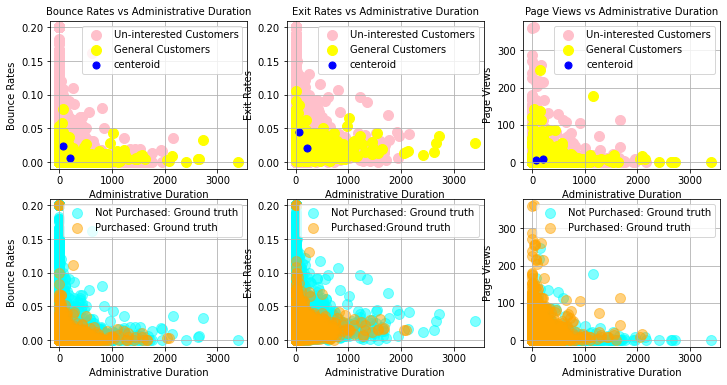

In [167]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.rcParams['figure.figsize'] = (12, 6)
plt.subplot(2,3,1)
plt.scatter(x[y_means == 0, 1], x[y_means == 0, 6], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 1], x[y_means == 1, 6], s = 100, c = 'yellow', label = 'General Customers')
#plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:, 6], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Administrative Duration', fontsize = 10)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.subplot(2,3,2)
plt.scatter(x[y_means == 0, 1], x[y_means == 0, 7], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 1], x[y_means == 1, 7], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:, 7], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Exit Rates vs Administrative Duration', fontsize = 10)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.subplot(2,3,3)
plt.scatter(x[y_means == 0, 1], x[y_means == 0, 8], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 1], x[y_means == 1, 8], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:, 8], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Page Views vs Administrative Duration', fontsize = 10)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Page Views')
plt.legend()

plt.subplot(2,3,4)
plt.scatter(df_new[yi==False, 1],df_new[yi==False,6],s = 100, c = 'cyan',alpha=0.5, label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 1],df_new[yi==True,6],s = 100, c = 'orange',alpha=0.5,  label = 'Purchased: Ground truth')
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.subplot(2,3,5)
plt.scatter(df_new[yi==False, 1],df_new[yi==False,7],s = 100, c = 'cyan',alpha=0.5, label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 1],df_new[yi==True,7],s = 100, c = 'orange',alpha=0.5,  label = 'Purchased:Ground truth')
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.subplot(2,3,6)
plt.scatter(df_new[yi==False, 1],df_new[yi==False,8],s = 100, c = 'cyan',alpha=0.5,label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 1],df_new[yi==True,8],s = 100, c = 'orange',alpha=0.5,  label = 'Purchased: Ground truth')
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Page Views')
plt.legend()

plt.show()

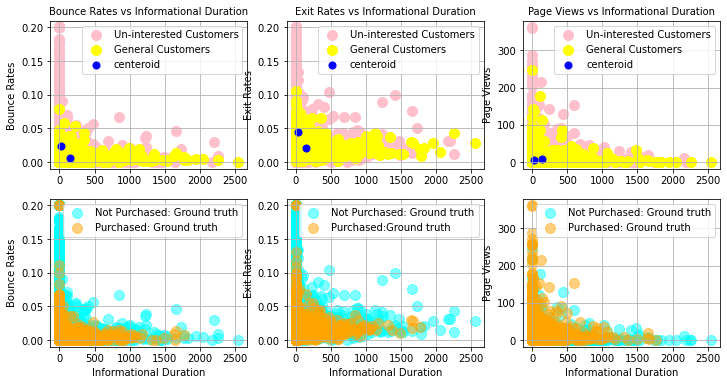

In [164]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.subplot(2,3,1)
plt.scatter(x[y_means == 0, 3], x[y_means == 0, 6], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 3], x[y_means == 1, 6], s = 100, c = 'yellow', label = 'General Customers')
#plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,3], km.cluster_centers_[:, 6], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Informational Duration', fontsize = 10)
plt.grid()
plt.ylabel('Bounce Rates')
plt.legend()
plt.subplot(2,3,2)
plt.scatter(x[y_means == 0, 3], x[y_means == 0, 7], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 3], x[y_means == 1, 7], s = 100, c = 'yellow',label = 'General Customers')
plt.scatter(km.cluster_centers_[:,3], km.cluster_centers_[:, 7], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Exit Rates vs Informational Duration', fontsize = 10)
plt.grid()
plt.ylabel('Exit Rates')
plt.legend()
plt.subplot(2,3,3)
plt.scatter(x[y_means == 0, 3], x[y_means == 0, 8], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 3], x[y_means == 1, 8], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(km.cluster_centers_[:,3], km.cluster_centers_[:, 8], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Page Views vs Informational Duration', fontsize = 10)
plt.grid()
plt.ylabel('Page Views')
plt.legend()
plt.subplot(2,3,4)
plt.scatter(df_new[yi==False, 3],df_new[yi==False,6],s = 100, c = 'cyan',alpha=0.5, label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 3],df_new[yi==True,6],s = 100, c = 'orange',alpha=0.5,  label = 'Purchased: Ground truth')
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.subplot(2,3,5)
plt.scatter(df_new[yi==False, 3],df_new[yi==False,7],s = 100, c = 'cyan',alpha=0.5, label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 3],df_new[yi==True,7],s = 100, c = 'orange',alpha=0.5,  label = 'Purchased:Ground truth')
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.subplot(2,3,6)
plt.scatter(df_new[yi==False, 3],df_new[yi==False,8],s = 100, c = 'cyan',alpha=0.5,label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 3],df_new[yi==True,8],s = 100, c = 'orange',alpha=0.5,  label = 'Purchased: Ground truth')
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Page Views')
plt.legend()
plt.show()

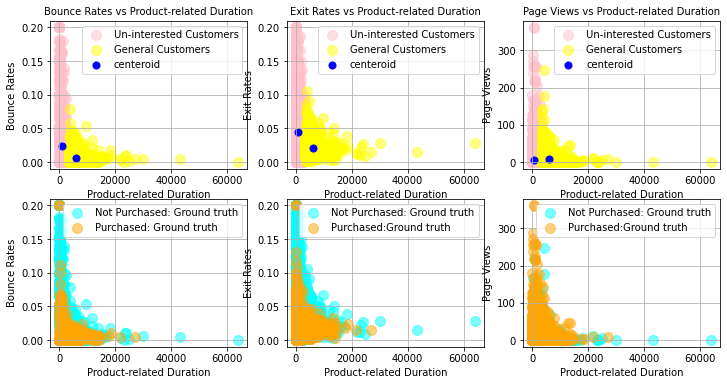

In [165]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.subplot(2,3,1)
plt.scatter(x[y_means == 0, 5], x[y_means == 0, 6], s = 100, c = 'pink', alpha=0.5,label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 5], x[y_means == 1, 6], s = 100, c = 'yellow', alpha=0.5,label = 'General Customers')
#plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,5], km.cluster_centers_[:, 6], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Product-related Duration', fontsize = 10)
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.subplot(2,3,2)
plt.scatter(x[y_means == 0, 5], x[y_means == 0, 7], s = 100, c = 'pink', alpha=0.5,label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 5], x[y_means == 1, 7], s = 100, c = 'yellow', alpha=0.5,label = 'General Customers')
plt.scatter(km.cluster_centers_[:,5], km.cluster_centers_[:, 7], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Exit Rates vs Product-related Duration', fontsize = 10)
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.subplot(2,3,3)
plt.scatter(x[y_means == 0, 5], x[y_means == 0, 8], s = 100, c = 'pink', alpha=0.5,label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 5], x[y_means == 1, 8], s = 100, c = 'yellow',alpha=0.5, label = 'General Customers')
plt.scatter(km.cluster_centers_[:,5], km.cluster_centers_[:, 8], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Page Views vs Product-related Duration', fontsize = 10)
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Page Views')
plt.legend()

plt.subplot(2,3,4)
plt.scatter(df_new[yi==False, 5],df_new[yi==False,6],s = 100, c = 'cyan',alpha=0.5, label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 5],df_new[yi==True,6],s = 100, c = 'orange',alpha=0.5, label = 'Purchased: Ground truth')
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.subplot(2,3,5)
plt.scatter(df_new[yi==False, 5],df_new[yi==False,7],s = 100, c = 'cyan',alpha=0.5, label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 5],df_new[yi==True,7],s = 100, c = 'orange',alpha=0.5, label = 'Purchased:Ground truth')
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.subplot(2,3,6)
plt.scatter(df_new[yi==False, 5],df_new[yi==False,8],s = 100, c = 'cyan', alpha=0.5,label = 'Not Purchased: Ground truth')
plt.scatter(df_new[yi==True, 5],df_new[yi==True,8],s = 100, c = 'orange',alpha=0.5, label = 'Purchased:Ground truth')
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Page Views')
plt.legend()

plt.show()

In [94]:
x[y_means == 0, 5]

array([  0.  ,  64.  ,  -1.  , ..., 184.25, 346.  ,  21.25])

In [115]:
df.iloc[:,6]

0        0.200000
1        0.000000
2        0.200000
3        0.050000
4        0.020000
           ...   
12325    0.007143
12326    0.000000
12327    0.083333
12328    0.000000
12329    0.000000
Name: BounceRates, Length: 12330, dtype: float64

In [90]:
yi = df.iloc[:, 17].values

In [91]:
df_new=df.values

In [100]:
df_new[df_new[:,17]==True,17]

array([True, True, True, ..., True, True, True], dtype=object)

In [13]:
x = df.iloc[:, [1, 6]].values
x.shape
from sklearn.cluster import KMeans
wcss = []
sil=[]
for i in range(2, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    s=silhouette_score(x, labels, metric='euclidean', sample_size=None, random_state=None)
    sil.append(s)
    wcss.append(km.inertia_)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[Text(0, 0.5, 'wcss'), Text(0.5, 0, 'No. of Clusters')]

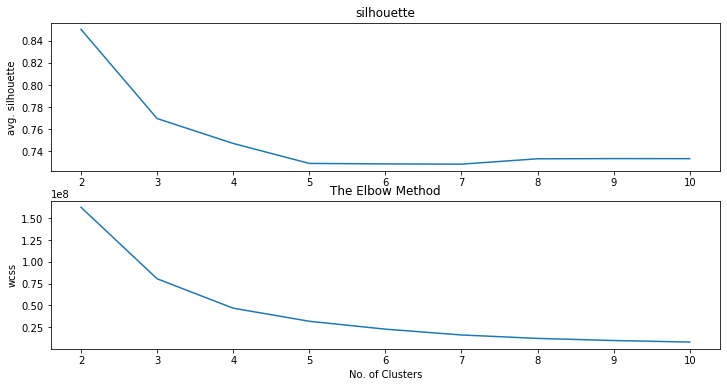

In [83]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
fig,axs=plt.subplots(2,1)
axs[0].plot(range(2,11),sil)
axs[0].set_title('silhouette')
axs[1].plot(range(2,11),wcss)
axs[1].set_title('The Elbow Method')
axs[0].set(ylabel="avg. silhouette")
axs[1].set(xlabel="No. of Clusters",ylabel="wcss")
#from the elbow method, three clusters will be optimal, while from the 

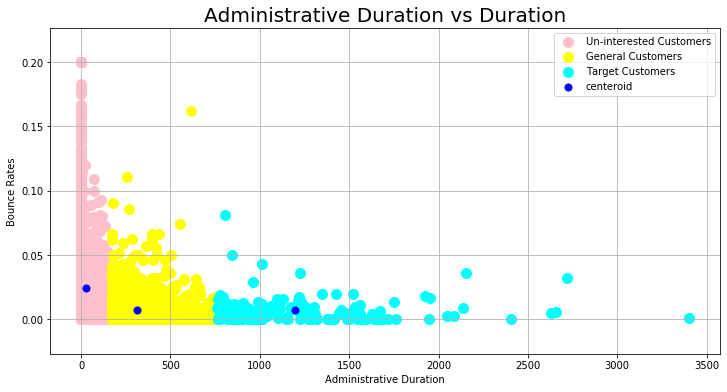

In [88]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [93]:
x.shape

(12330, 2)

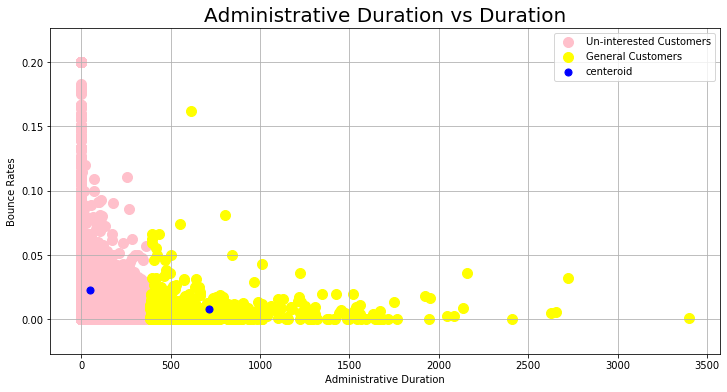

In [86]:
#if we use silhouette methods, there are two clusters.
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
#plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

[0.8504308276805831,
 0.7695448932449144,
 0.7469467647260214,
 0.7288353031111129,
 0.72838368926993,
 0.7281659790461773,
 0.7330372564560652,
 0.7332000758426017,
 0.7331589578030638]

In [94]:
x2 = df.iloc[:, [3, 6]].values
x2.shape
from sklearn.cluster import KMeans
wcss2 = []
sil2=[]
for i in range(2, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x2)
    labels = km.labels_
    s=silhouette_score(x, labels, metric='euclidean', sample_size=None, random_state=None)
    sil2.append(s)
    wcss2.append(km.inertia_)

[Text(0, 0.5, 'wcss'), Text(0.5, 0, 'No. of Clusters')]

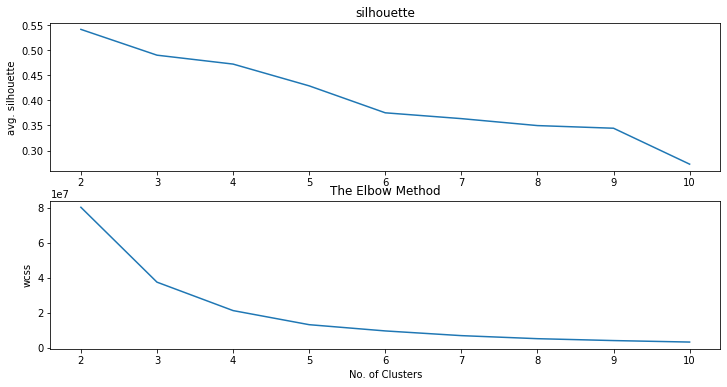

In [95]:
plt.rcParams['figure.figsize'] = (12, 6)
fig,axs=plt.subplots(2,1)
axs[0].plot(range(2,11),sil2)
axs[0].set_title('silhouette')
axs[1].plot(range(2,11),wcss2)
axs[1].set_title('The Elbow Method')
axs[0].set(ylabel="avg. silhouette")
axs[1].set(xlabel="No. of Clusters",ylabel="wcss")
#according to sihouette, two clusters are optimal
#according to elbow method, 4 clusters are the best.

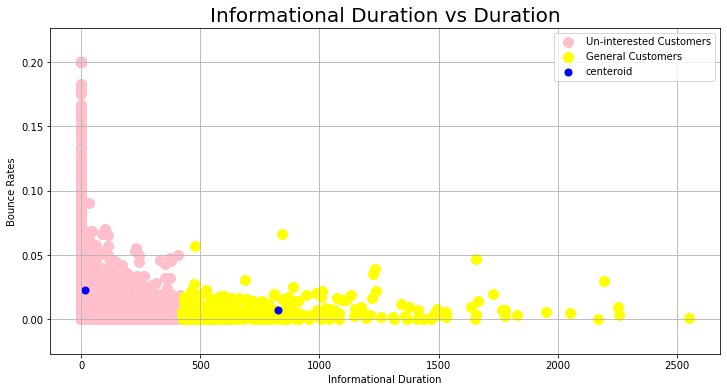

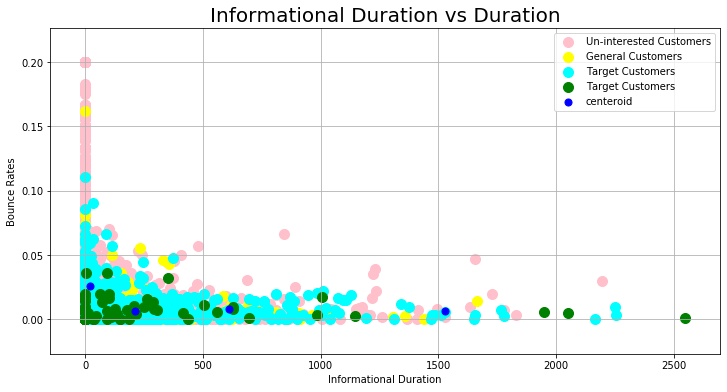

In [96]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x2)

plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
#plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 100, c = 'green', label = 'Target Customers')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

## Product-related duration

In [97]:
x3 = df.iloc[:, [5, 6]].values
x3.shape
from sklearn.cluster import KMeans
wcss3 = []
sil3=[]
for i in range(2, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x3)
    labels = km.labels_
    s=silhouette_score(x, labels, metric='euclidean', sample_size=None, random_state=None)
    sil3.append(s)
    wcss3.append(km.inertia_)

[Text(0, 0.5, 'wcss'), Text(0.5, 0, 'No. of Clusters')]

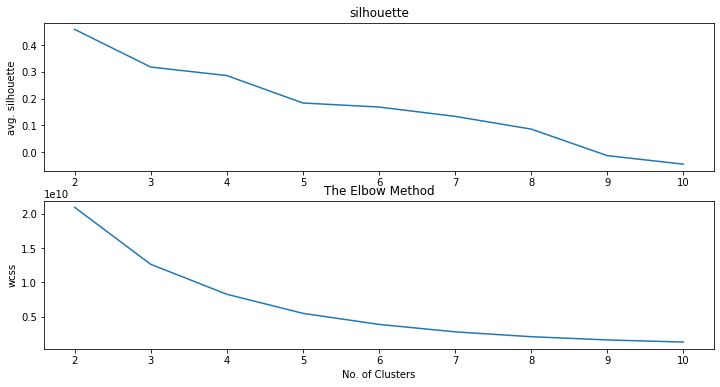

In [98]:
plt.rcParams['figure.figsize'] = (12, 6)
fig,axs=plt.subplots(2,1)
axs[0].plot(range(2,11),sil3)
axs[0].set_title('silhouette')
axs[1].plot(range(2,11),wcss3)
axs[1].set_title('The Elbow Method')
axs[0].set(ylabel="avg. silhouette")
axs[1].set(xlabel="No. of Clusters",ylabel="wcss")

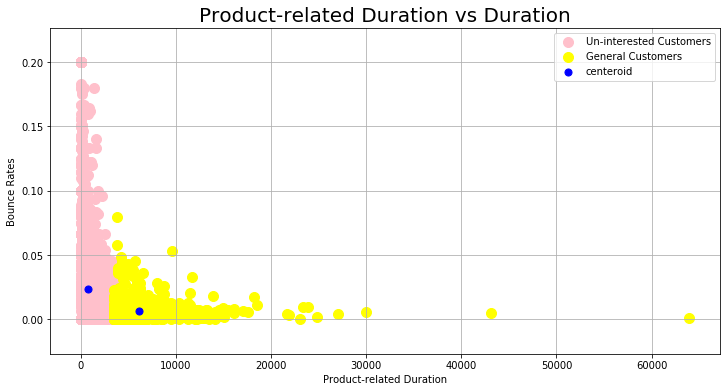

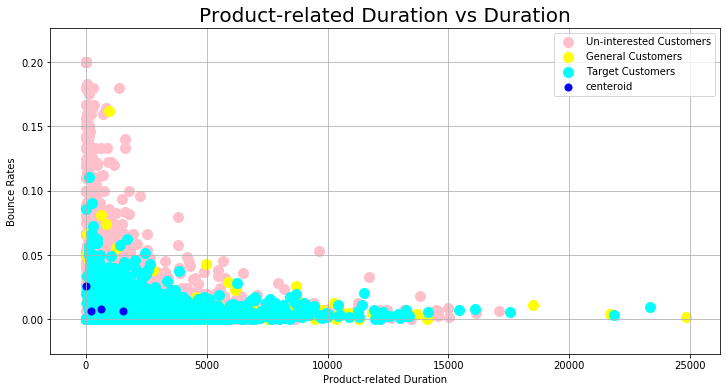

In [99]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x3)

plt.scatter(x3[y_means == 0, 0], x3[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x3[y_means == 1, 0], x3[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
#plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Product-related Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x3[y_means == 0, 0], x3[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x3[y_means == 1, 0], x3[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x3[y_means == 2, 0], x3[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
#plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 100, c = 'green', label = 'Target Customers')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Product-related Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [104]:
x4 = df.iloc[:, [1, 8]].values
x4.shape
from sklearn.cluster import KMeans
wcss4 = []
sil4=[]
for i in range(2, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x4)
    labels = km.labels_
    s=silhouette_score(x, labels, metric='euclidean', sample_size=None, random_state=None)
    sil4.append(s)
    wcss4.append(km.inertia_)

[Text(0, 0.5, 'wcss'), Text(0.5, 0, 'No. of Clusters')]

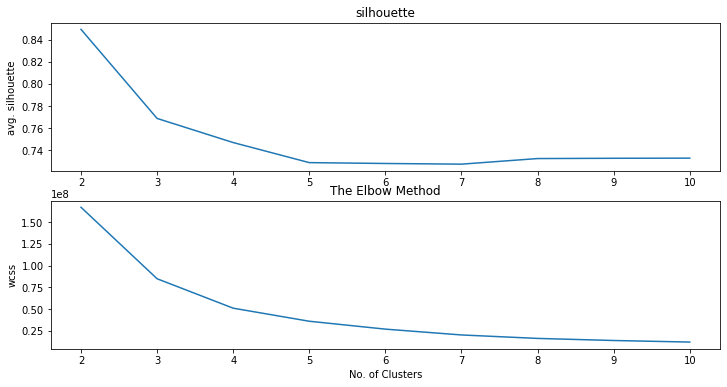

In [105]:
plt.rcParams['figure.figsize'] = (12, 6)
fig,axs=plt.subplots(2,1)
axs[0].plot(range(2,11),sil4)
axs[0].set_title('silhouette')
axs[1].plot(range(2,11),wcss4)
axs[1].set_title('The Elbow Method')
axs[0].set(ylabel="avg. silhouette")
axs[1].set(xlabel="No. of Clusters",ylabel="wcss")

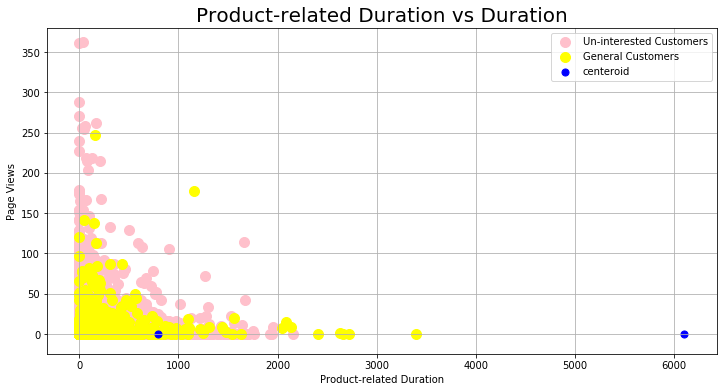

In [107]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x3)

plt.scatter(x4[y_means == 0, 0], x4[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x4[y_means == 1, 0], x4[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
#plt.scatter(x4[y_means == 2, 0], x4[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Product-related Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Product-related Duration')
plt.ylabel('Page Views')
plt.legend()
plt.show()

In [18]:
data1 = pd.get_dummies(df)
data1.columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [19]:
x = data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)
y = df['Revenue']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


/Users/huerzhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9907310856215966
Testing Accuracy : 0.8832116788321168
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3077
           1       0.72      0.50      0.59       622

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.81      0.73      0.76      3699
weighted avg       0.87      0.88      0.87      3699



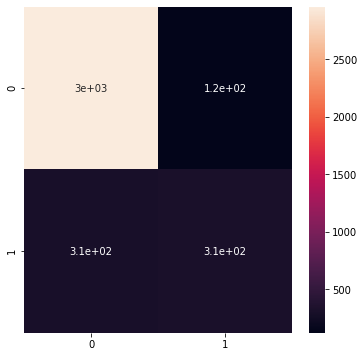

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(max_depth=min_samples_split)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [23]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 22.0min finished


In [27]:
gridF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Training Accuracy : 0.9193604449078902
Testing Accuracy : 0.8929440389294404
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3077
           1       0.77      0.51      0.62       622

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.84      0.74      0.78      3699
weighted avg       0.89      0.89      0.88      3699



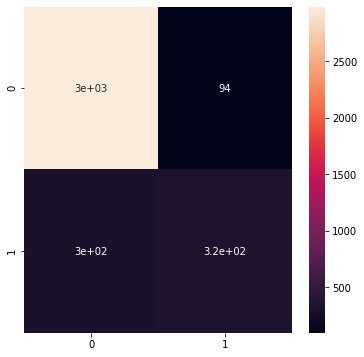

In [28]:
model2 = RandomForestClassifier(max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=800)
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

# evaluating the model
print("Training Accuracy :", model2.score(x_train, y_train))
print("Testing Accuracy :", model2.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)